In [48]:
# 1. Importação de Bibliotecas e Preparação do Ambiente

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import json
import string

# Download de recursos da NLTK (necessário apenas na primeira execução)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')



In [49]:
with open(r'JsonSoup/JsonRacas/stem/dwarf_stemmed_structured.json', 'r') as file_object:
        jsonCarregado = json.load(file_object)

def extract_strings(obj):
    if isinstance(obj, str):
        yield obj
    elif isinstance(obj, dict):
        for v in obj.values():
            yield from extract_strings(v)
    elif isinstance(obj, list):
        for item in obj:
            yield from extract_strings(item)

# Turn into a list (corpus)
corpusAux = list(extract_strings(jsonCarregado))

corpus = [
    s.translate(str.maketrans("", "", string.punctuation))
    for s in corpusAux
]

stemmer = PorterStemmer()
# Carrega a lista de stopwords original da NLTK
english_stop_words_original = set(stopwords.words('english'))
english_stop_words_original.update(string.punctuation)

stop_words_stemmed = [stemmer.stem(word) for word in english_stop_words_original]

def stem_tokenizer(text):
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

bow_vec = CountVectorizer(
    lowercase=True,
    stop_words=stop_words_stemmed,  # Usa a lista de stopwords corrigida
    tokenizer=stem_tokenizer
)
X_bow = bow_vec.fit_transform(corpus)
df_bow = pd.DataFrame(X_bow.toarray(), columns=bow_vec.get_feature_names_out())

print("Matriz Documento-Termo (BoW):")
df_bow



Matriz Documento-Termo (BoW):


C:\Users\deant\Documentos\FURB\PLN\WebScrapping\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\deant\Documentos\FURB\PLN\WebScrapping\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['becau'] not in stop_words.
  warnings.warn(


,1,150,2,25,350,4,5,50,60,abil,...,well,wellord,whatev,whenev,wisdom,within,write,year,young,–
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
tfidf_vec = TfidfVectorizer(
    lowercase=True,
    stop_words=stop_words_stemmed, # Usa a lista de stopwords corrigida
    tokenizer=stem_tokenizer
)
X_tfidf = tfidf_vec.fit_transform(corpus)
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vec.get_feature_names_out())

print("Matriz Documento-Termo (TF-IDF):")
df_tfidf.round(3)

Matriz Documento-Termo (TF-IDF):


C:\Users\deant\Documentos\FURB\PLN\WebScrapping\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\deant\Documentos\FURB\PLN\WebScrapping\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['becau'] not in stop_words.
  warnings.warn(


,1,150,2,25,350,4,5,50,60,abil,...,well,wellord,whatev,whenev,wisdom,within,write,year,young,–
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.2
2,0.000,0.000,0.331,0.000,0.000,0.000,0.000,0.000,0.000,0.299,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
3,0.000,0.000,0.000,0.000,0.259,0.000,0.000,0.259,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.259,0.259,0.0
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.187,0.212,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
5,0.000,0.284,0.000,0.000,0.000,0.284,0.284,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
6,0.000,0.000,0.000,0.247,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.157,0.000,...,0.000,0.000,0.000,0.000,0.000,0.157,0.000,0.000,0.000,0.0
8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0


In [52]:
def search_and_rank(query, vectorizer, X_corpus, corpus, method_name):
    """
    Vetoriza uma query, calcula a similaridade com o corpus e exibe os resultados.
    """
    q_vec = vectorizer.transform([query])
    sim_scores = cosine_similarity(q_vec, X_corpus).ravel()
    rank = np.argsort(sim_scores)[::-1]

    print(f"Top-3 Similares para a Query (usando {method_name}):")
    for i in rank[:3]:
        if sim_scores[i] > 0.01: # Apenas mostra se houver alguma similaridade
            print(f"  Doc{i+1} (score={sim_scores[i]:.3f}): {corpus[i]}")
    print("-" * 40)

query = 'The tough dwarf lives in the mountain'
print(f">> Executando busca para a query: '{query}'\n")
search_and_rank(query, bow_vec, X_bow, corpus, "BoW")
search_and_rank(query, tfidf_vec, X_tfidf, corpus, "TF-IDF")

>> Executando busca para a query: 'The tough dwarf lives in the mountain'

Top-3 Similares para a Query (usando BoW):
  Doc18 (score=0.707): mountain dwarf
  Doc14 (score=0.354): hill dwarf
  Doc19 (score=0.320): as a mountain dwarf you re strong and hardi accustom to a difficult life in rug terrain you re probabl on the tall side for a dwarf and tend toward lighter color the shield dwarv of northern faerun as well as the rule hylar clan and the nobl daewar clan of dragonl are mountain dwarv
----------------------------------------
Top-3 Similares para a Query (usando TF-IDF):
  Doc18 (score=0.594): mountain dwarf
  Doc14 (score=0.234): hill dwarf
  Doc19 (score=0.227): as a mountain dwarf you re strong and hardi accustom to a difficult life in rug terrain you re probabl on the tall side for a dwarf and tend toward lighter color the shield dwarv of northern faerun as well as the rule hylar clan and the nobl daewar clan of dragonl are mountain dwarv
-------------------------------------

Calculando a matriz de similaridade de cossenos...


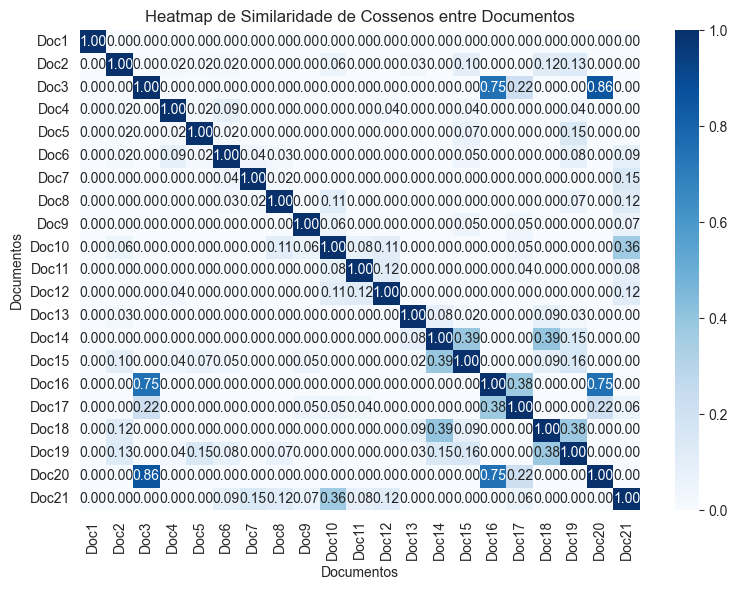

In [53]:
# 7. Visualizações

# a) Heatmap da Similaridade de Cossenos entre Documentos
# Primeiro, calculamos a matriz de similaridade (documento x documento) usando a matriz TF-IDF
print("Calculando a matriz de similaridade de cossenos...")
sim_matrix = cosine_similarity(X_tfidf, X_tfidf)

# Para melhor visualização, criamos um DataFrame com os rótulos corretos
doc_labels = [f"Doc{i+1}" for i in range(len(corpus))]
df_similarity = pd.DataFrame(sim_matrix, index=doc_labels, columns=doc_labels)

# Agora, geramos o heatmap a partir dessa matriz de similaridade
plt.figure(figsize=(8, 6))
sns.heatmap(
    df_similarity,
    annot=True,          # Exibe os valores de similaridade nas células
    cmap="Blues",        # Mapa de cores em tons de azul
    fmt=".2f"            # Formata os números com duas casas decimais
)
plt.title("Heatmap de Similaridade de Cossenos entre Documentos")
plt.xlabel("Documentos")
plt.ylabel("Documentos")
plt.tight_layout()
plt.show()

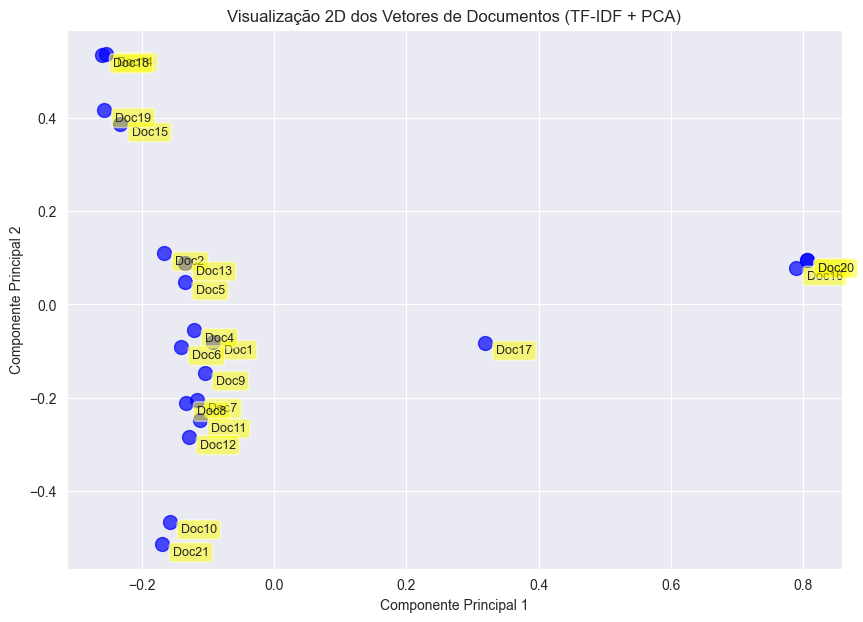

In [54]:
# b) Visualização dos Documentos em 2D com PCA
pca = PCA(n_components=2)
# Usamos .toarray() para converter a matriz esparsa para uma matriz densa
X_tfidf_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(X_tfidf_pca[:, 0], X_tfidf_pca[:, 1], c='blue', alpha=0.7, s=100)
plt.title("Visualização 2D dos Vetores de Documentos (TF-IDF + PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)

# Adiciona anotações para cada ponto
for i, _ in enumerate(corpus):
    plt.annotate(f"Doc{i+1}", (X_tfidf_pca[i, 0], X_tfidf_pca[i, 1]),
                 xytext=(8, -8), textcoords='offset points', fontsize=9,
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5))
plt.show()